In [1]:
import numpy as np
import pandas as pd
import json
from scipy import optimize
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime, timedelta
import matplotlib.dates as dates
import uncertainties.unumpy as unp
import uncertainties as unc
import geopandas as gpd

In [2]:
# functions

In [3]:
def exponential(x, a, b):
    return a * np.exp(x*b)

In [70]:
fn = "../jhu-csse-COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-"
dfc = pd.read_csv(fn+'Confirmed.csv')
dfd = pd.read_csv(fn+'Deaths.csv')
dfr = pd.read_csv(fn+'Recovered.csv')

In [51]:
countries = ['Italy', 'Spain', 'Germany', 'Korea, South']

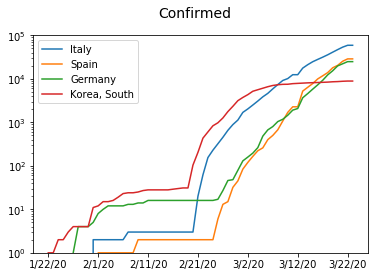

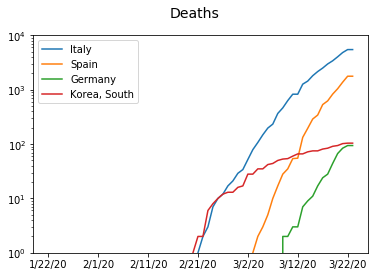

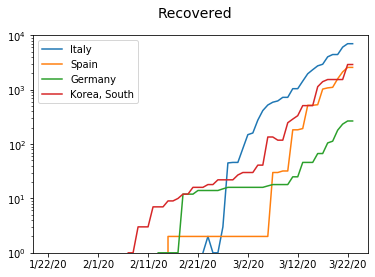

In [86]:
fig, ax = plt.subplots()
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

for country in countries:
    dftemp = dfc.set_index('Country/Region').loc[country, '1/22/20':].T
    dftemp.plot(label = country, ax = ax, logy = True, ylim = [1,10**5])
    
    dftemp = dfd.set_index('Country/Region').loc[country, '1/22/20':].T
    dftemp.plot(label = country, ax = ax1, logy = True, ylim = [1,10**4])
    
    dftemp = dfr.set_index('Country/Region').loc[country, '1/22/20':].T
    dftemp.plot(label = country, ax = ax2, logy = True, ylim = [1,10**4])

ax.legend()
ax1.legend()
ax2.legend()
    
fig.suptitle('Confirmed', size= 14)
fig1.suptitle('Deaths', size= 14)
fig2.suptitle('Recovered', size= 14)

fig.savefig('plot/2020-03-26-Emamuele-Comparison-Confirmed.png', dpi=100)
fig1.savefig('plot/2020-03-26-Emamuele-Comparison-Deaths.png', dpi=100)
fig2.savefig('plot/2020-03-26-Emamuele-Comparison-Recovered.png', dpi=100)


In [59]:
dfp = df.set_index('Country/Region').loc[country, '1/22/20':].T
dfp

1/22/20      0
1/23/20      0
1/24/20      0
1/25/20      0
1/26/20      0
          ... 
3/19/20     91
3/20/20     94
3/21/20    102
3/22/20    104
3/23/20    104
Name: Korea, South, Length: 62, dtype: object

In [44]:
df['Country/Region'].values

array(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada',
       'Australia', 'Australia', 'Australia', 'Cambodia', 'Sri Lanka',
       'Germany', 'Finland', 'United Arab Emirates', 'Philippines',
       'India', 'Italy', 'Sweden', 'Spain', 'Australia', 'Belgium',
       'Egypt', 'Australia', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Algeria', 'Croatia', 'Switzerland',
       'Austria', 'Israel', 'Pakistan', 'Brazil', 'Georgia', 'Greece',
       'North Macedonia', 'Norway', 'Romania', 'Estonia', 'San Marino',
       'Belarus', 'Iceland', 'Lithuania', 'Mexico', 'New Zealand',
       'Nigeria', 'Australia', 'Ireland', 'Luxembourg', 'Monaco', 'Qatar',
       'Ecuador', 'Azerbaijan', 'Armenia', 'Dominican Republic',
       'Indonesia', 'Portugal', 'Andorra', 'Australia', 'Latvia',
       'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile',
       'Jordan', 'Ukraine', 'Hungary', 'Australia', 'Liechtenstein',
       'Poland', 'Tunisia', 'Bosn

In [19]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20'],
      dtype='object')